# Projet 9 : Produisez une étude de marché avec R ou Python

## 1. Importation des librairies

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn import preprocessing
from sklearn import decomposition
from sklearn import cluster, metrics
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from matplotlib.collections import LineCollection
from sklearn.metrics import silhouette_score
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings("ignore")

## 2. Importation du fichier CSV Data_finale

In [41]:
# Importer le fichier Data_finale 

Data_finale = pd.read_csv('Data_finale.csv')
Data_finale.head()

,Zone,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%)
0,Afghanistan,0.247101,37171921.0,-2.53,3.0,0.54,57.0,49.122807,50.877193
1,Afrique du Sud,0.092891,57792518.0,-0.71,17.0,14.11,2118.0,78.706327,24.268178
2,Albanie,-0.009564,2882740.0,0.11,9.0,6.26,47.0,27.659574,80.851064
3,Algérie,0.129027,42228408.0,-0.88,6.0,1.97,277.0,99.277978,0.722022
4,Allemagne,0.020710,83124418.0,0.76,6.0,7.96,1739.0,87.061530,48.418631


## 3. CLASSIFICATION ASCENDANTE HIÉRARCHIQUE (CAH)

### 3.1 Affichage de la CAH pour avoir une première analyse des clusters

In [42]:
# Sélectionnez uniquement les colonnes numériques (excluez les colonnes non numériques)
colonnes_numeriques = Data_finale.select_dtypes(include=[float, int])

# Centrage / réduction des données
std_scale = StandardScaler().fit(colonnes_numeriques)
colonnes_numeriques_scaled = std_scale.transform(colonnes_numeriques)

# Vous pouvez ensuite utiliser ces colonnes mises à l'échelle pour votre clustering hiérarchique
Z = linkage(colonnes_numeriques_scaled, method='ward', metric='euclidean')

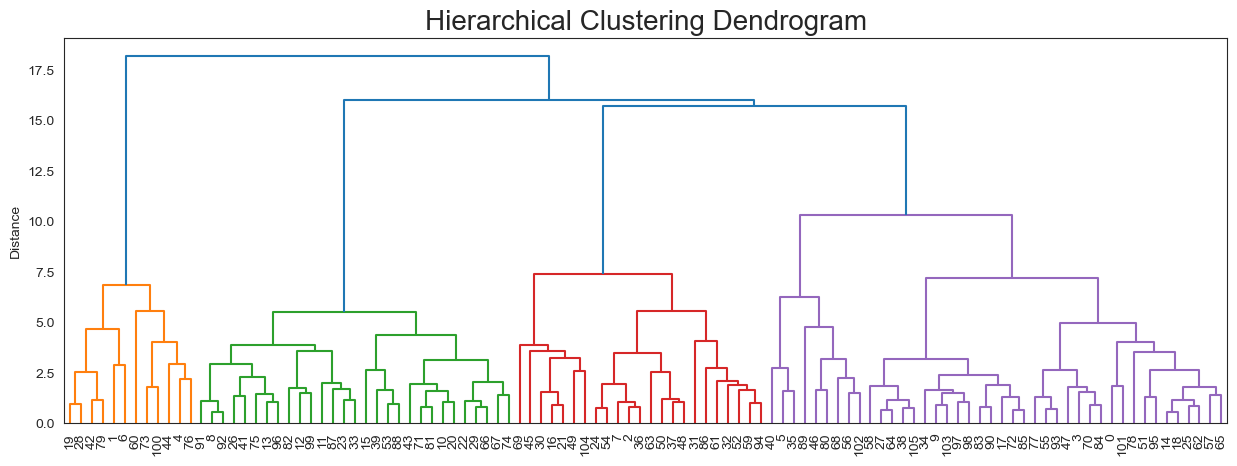

In [43]:
#Clustering hiérarchique: 
#Affichage d'un premier dendrogramme global
fig =plt.figure(figsize=(15,5))
sns.set_style('white')
plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.ylabel('Distance')
dendrogram(Z, labels = Data_finale.index, leaf_font_size=10, color_threshold=12, orientation='top')
plt.show()

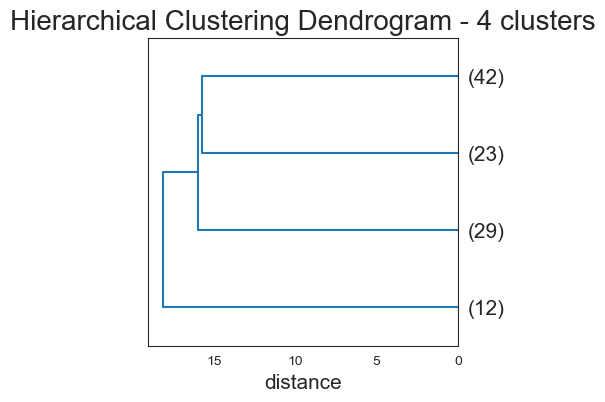

In [44]:
#Découpage du dendrogramme en 4 groupes pour avoir une première idée du partitionnement
fig = plt.figure(figsize=(4,4))
plt.title('Hierarchical Clustering Dendrogram - 4 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)
dendrogram(Z, labels = Data_finale.index, p=4, truncate_mode='lastp', leaf_font_size=15, orientation='left')
plt.show()

OBSERVATIONS
Nous optons pour 4 clusters qui se déclinent de la manière suivante :

    - Groupe 1 : 12 pays
    - Groupe 2 : 29 pays
    - Groupe 3 : 23 pays
    - Groupe 4 : 42 pays
   

Nous analyserons ces 4 groupes pour vérifier la pertinence de cette partition par la suite

## 4. La Méthode K-MEANS

### 4.1 Recherche et vérification du nombre de clusters
### Méthode du Coude

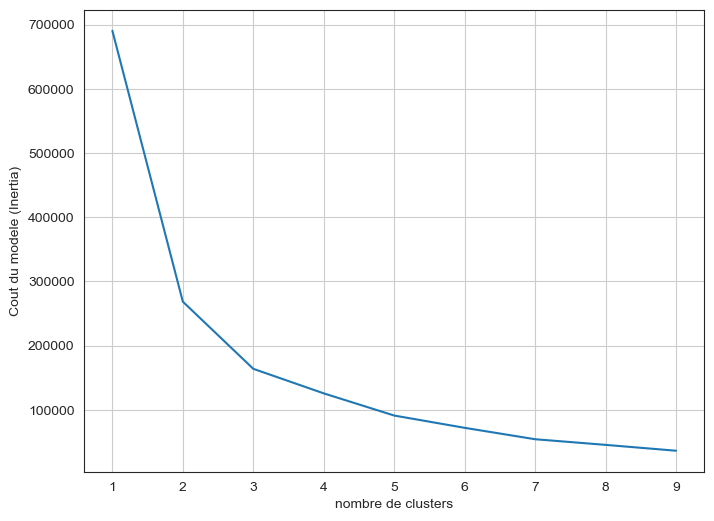

In [45]:
inertia = []
k_range=range(1,10)
for k in k_range:
    model=KMeans(n_clusters=k).fit(Z)
    inertia.append(model.inertia_)
    
fig = plt.figure(figsize=(8,6))
plt.plot(k_range,inertia )
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.grid()
plt.show()

### 4.2 Affichage des Clusters avec les Centroides

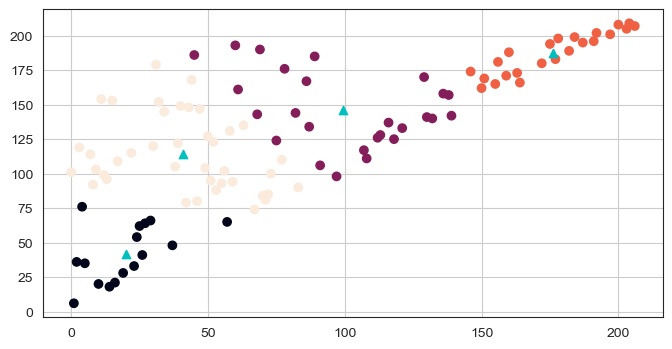

Inertie totale : 125664.64567071383


In [46]:
# Affichage du nuage de points (individus) en cluster avec les centoîdes
fig = plt.figure(figsize=(8,4))
model = KMeans(n_clusters=4)
model.fit(Z)
model.predict(Z)
plt.scatter(Z[:,0], Z[:,1],c=model.predict(Z))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='^',c='c')
plt.grid()
plt.show()
print('Inertie totale :',model.inertia_)

### 4.3 Methode de la silhouette

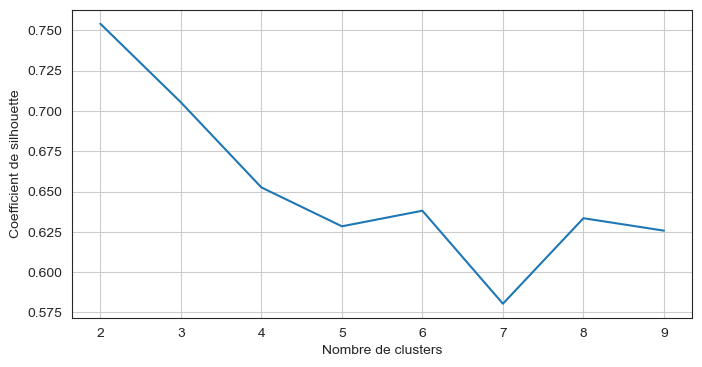

[0.7541159428010843, 0.7053665627010599, 0.6525435497705784, 0.6284062091153599, 0.6380819171248545, 0.580369325721259, 0.6334293296671968, 0.625704261847816]


In [47]:
# Sélectionnez uniquement les colonnes numériques (excluez les colonnes non numériques)
colonnes_numeriques = Data_finale.select_dtypes(include=[float, int])

# Créez une liste pour stocker les scores de silhouette
tab_silhouette = []

# Définissez la plage de nombres de clusters que vous souhaitez tester
k_range = range(2, 10)

for k in k_range:
    model = KMeans(n_clusters=k)
    cluster_labels = model.fit_predict(colonnes_numeriques)
    score = silhouette_score(colonnes_numeriques, cluster_labels)
    tab_silhouette.append(score)

# Tracez les résultats
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 4))
plt.plot(k_range, tab_silhouette)
plt.xlabel('Nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid()
plt.show()

print(tab_silhouette)


### 4.4 Projections des clusters sur les axes

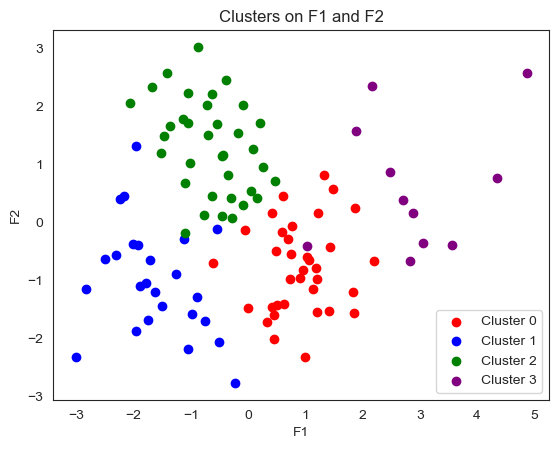

In [53]:
# Appliquez PCA sur vos données avec 4 composantes principales
pca = PCA(n_components=4)
X_projected = pca.fit_transform(X_scaled)

# Parcourez chaque cluster et tracez les points avec la couleur correspondante sur F3 et F4
for cluster_num, color in cluster_colors.items():
    cluster_points = X_projected[clusters == cluster_num]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=color, label=f'Cluster {cluster_num}')

# Affichez la légende
plt.legend()
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Clusters on F1 and F2')
plt.show()

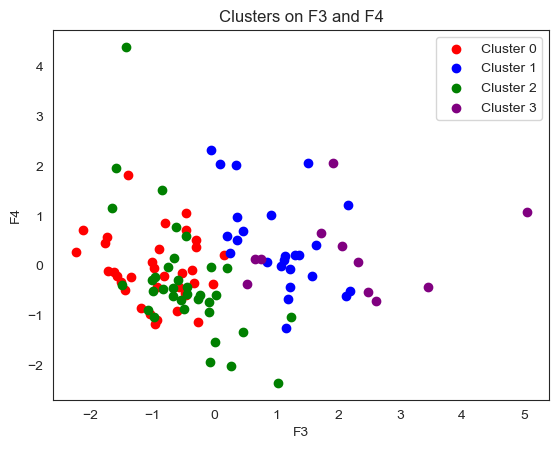

In [54]:
# Appliquez PCA sur vos données avec 4 composantes principales
pca = PCA(n_components=4)
X_projected = pca.fit_transform(X_scaled)

# Parcourez chaque cluster et tracez les points avec la couleur correspondante sur F3 et F4
for cluster_num, color in cluster_colors.items():
    cluster_points = X_projected[clusters == cluster_num]
    plt.scatter(cluster_points[:, 2], cluster_points[:, 3], c=color, label=f'Cluster {cluster_num}')

# Affichez la légende
plt.legend()
plt.xlabel('F3')
plt.ylabel('F4')
plt.title('Clusters on F3 and F4')
plt.show()



## 5. Analyse des Groupes

In [55]:
Data_finale.head()

,Zone,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%)
0,Afghanistan,0.247101,37171921.0,-2.53,3.0,0.54,57.0,49.122807,50.877193
1,Afrique du Sud,0.092891,57792518.0,-0.71,17.0,14.11,2118.0,78.706327,24.268178
2,Albanie,-0.009564,2882740.0,0.11,9.0,6.26,47.0,27.659574,80.851064
3,Algérie,0.129027,42228408.0,-0.88,6.0,1.97,277.0,99.277978,0.722022
4,Allemagne,0.020710,83124418.0,0.76,6.0,7.96,1739.0,87.061530,48.418631


In [56]:
# Identification des 4 groupes obtenus
groupes_cah = fcluster(Z, 4, criterion='maxclust')
# Index triés des groupes
idg = np.argsort(groupes_cah)
# Création d'un DataFrame avec les noms des pays et les groupes
df = pd.DataFrame({'Zone': Data_finale['Zone'].values[idg], 'Groupe': groupes_cah[idg]})

In [57]:
#Intégration des références des groupes dans notre échantillon de départ représenté par le dataframe "JOINTURE FINALE"
#Jointure interne nécessaire pour parvenir à agréger nos données
df3 = pd.merge(Data_finale, df, on='Zone')
df3.set_index('Zone', inplace=True)
df3.head()

,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Groupe
Zone,,,,,,,,,
Afghanistan,0.247101,37171921.0,-2.53,3.0,0.54,57.0,49.122807,50.877193,4
Afrique du Sud,0.092891,57792518.0,-0.71,17.0,14.11,2118.0,78.706327,24.268178,1
Albanie,-0.009564,2882740.0,0.11,9.0,6.26,47.0,27.659574,80.851064,3
Algérie,0.129027,42228408.0,-0.88,6.0,1.97,277.0,99.277978,0.722022,4
Allemagne,0.020710,83124418.0,0.76,6.0,7.96,1739.0,87.061530,48.418631,1


In [71]:
#afficher les moyennes des variables de chaque groupe
groupe=(1,2,3,4)
for n in groupe:
    affi=df3.loc[df3['Groupe']==n].mean()
    affi_entier = affi.astype(int)
    print (affi_entier)

Croissance démographique (%)           0
Population                      74409844
Stab Politique                         0
Pib (%)                                5
Disp_prot_g/per/jour                   9
Disponibilité intérieure            1820
TAS (%)                               85
TDI (%)                               26
Groupe                                 1
dtype: int32
Croissance démographique (%)          0
Population                      7383551
Stab Politique                        0
Pib (%)                               7
Disp_prot_g/per/jour                  8
Disponibilité intérieure            206
TAS (%)                             107
TDI (%)                              33
Groupe                                2
dtype: int32
Croissance démographique (%)          0
Population                      6688903
Stab Politique                        0
Pib (%)                               6
Disp_prot_g/per/jour                  5
Disponibilité intérieure            105
TAS (

### 5.1 Les 4 Clusters

In [72]:
# Cluster 1
cluster_1=df3.loc[df3['Groupe']==1]
cluster_1.head()

,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Groupe
Zone,,,,,,,,,
Afrique du Sud,0.092891,57792518.0,-0.71,17.0,14.11,2118.0,78.706327,24.268178,1
Allemagne,0.020710,83124418.0,0.76,6.0,7.96,1739.0,87.061530,48.418631,1
Arabie saoudite,0.190975,33702756.0,-0.58,6.0,15.57,1435.0,42.926829,50.313589,1
Canada,0.059175,37074562.0,0.94,7.0,13.86,1433.0,98.883461,12.700628,1
Espagne,-0.010181,46692858.0,0.58,6.0,12.47,1497.0,101.202405,13.694055,1


In [73]:
cluster_1.shape

(12, 9)

In [74]:
# Cluster 2
cluster_2=df3.loc[df3['Groupe']==2]
cluster_2.head()

,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Groupe
Zone,,,,,,,,,
Autriche,0.039368,8891388.0,0.91,5.0,7.49,173.0,85.549133,63.583815,2
Bolivie (État plurinational de),0.096835,11353142.0,-0.32,10.0,11.43,429.0,124.242424,0.233100,2
Bosnie-Herzégovine,-0.067565,3323925.0,-0.38,6.0,5.66,55.0,110.909091,18.181818,2
Botswana,0.100725,2254068.0,0.98,11.0,1.19,7.0,71.428571,42.857143,2
Bulgarie,-0.028952,7051608.0,0.46,9.0,8.74,157.0,68.152866,68.789809,2


In [75]:
cluster_2.shape

(29, 9)

In [76]:
# Cluster 3
cluster_3=df3.loc[df3['Groupe']==3]
cluster_3.head()

,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Groupe
Zone,,,,,,,,,
Albanie,-0.009564,2882740.0,0.11,9.0,6.26,47.0,27.659574,80.851064,3
Arménie,0.019728,2951745.0,-0.84,9.0,5.44,47.0,23.404255,74.468085,3
Bénin,0.210597,11485044.0,-0.30,7.0,4.98,161.0,11.180124,76.397516,3
Congo,0.192011,5244359.0,-0.61,8.0,7.45,110.0,6.363636,94.545455,3
Cuba,0.007383,11338134.0,0.43,5.0,7.12,342.0,8.479532,91.228070,3


In [77]:
cluster_3.shape

(23, 9)

In [78]:
# Cluster 4
cluster_4=df3.loc[df3['Groupe']==4]
cluster_4.head()

,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Groupe
Zone,,,,,,,,,
Afghanistan,0.247101,37171921.0,-2.53,3.0,0.54,57.0,49.122807,50.877193,4
Algérie,0.129027,42228408.0,-0.88,6.0,1.97,277.0,99.277978,0.722022,4
Angola,0.287203,30809787.0,-0.71,20.0,3.60,319.0,13.166144,86.833856,4
Azerbaïdjan,0.071482,9949537.0,-0.85,7.0,4.45,129.0,80.620155,20.930233,4
Burkina Faso,0.225878,19751466.0,-1.64,9.0,0.77,46.0,100.000000,0.000000,4


In [79]:
cluster_4.shape

(42, 9)

### 5.2 La distribution des variables par groupe avec les boxplots

In [80]:
import ipywidgets as widgets
from IPython.display import display

# Créez un bouton de zoom
zoom_button = widgets.Button(description="Zoom In")

# Créez une fonction de zoom
def zoom_in(event):
    # Insérez ici le code pour agrandir le graphique
    pass

# Attachez la fonction de zoom au bouton
zoom_button.on_click(zoom_in)

# Affichez le bouton dans la cellule
display(zoom_button)

Button(description='Zoom In', style=ButtonStyle())

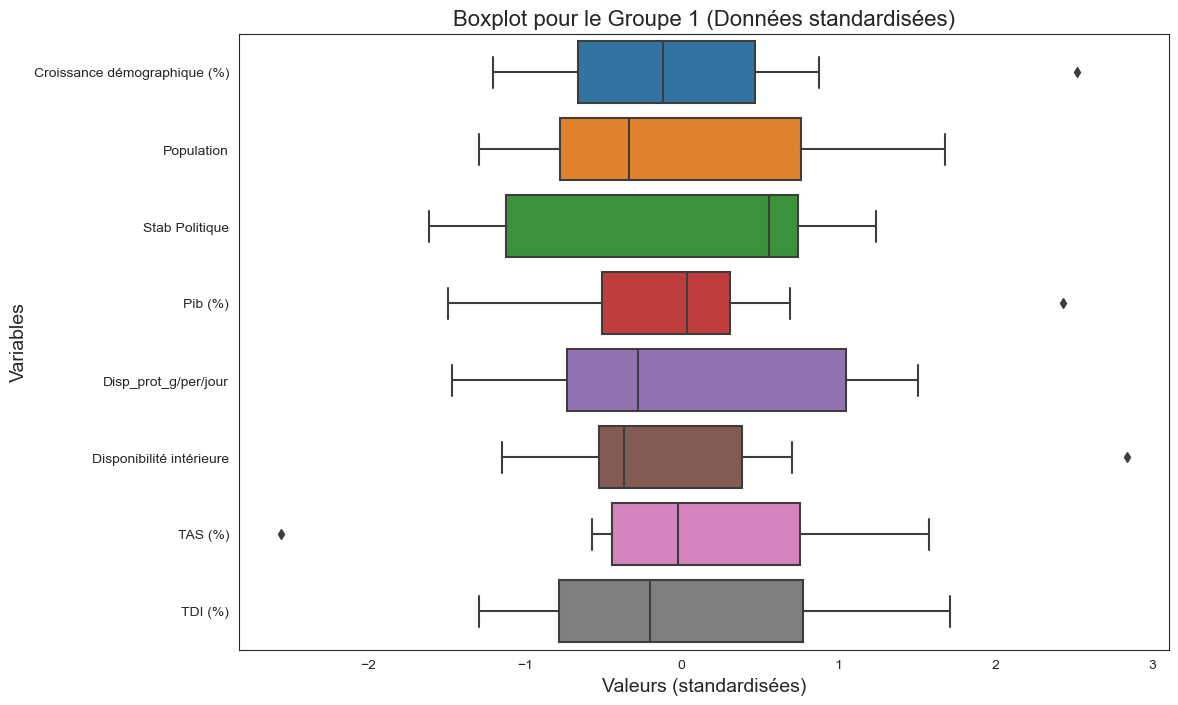

<Figure size 640x480 with 0 Axes>

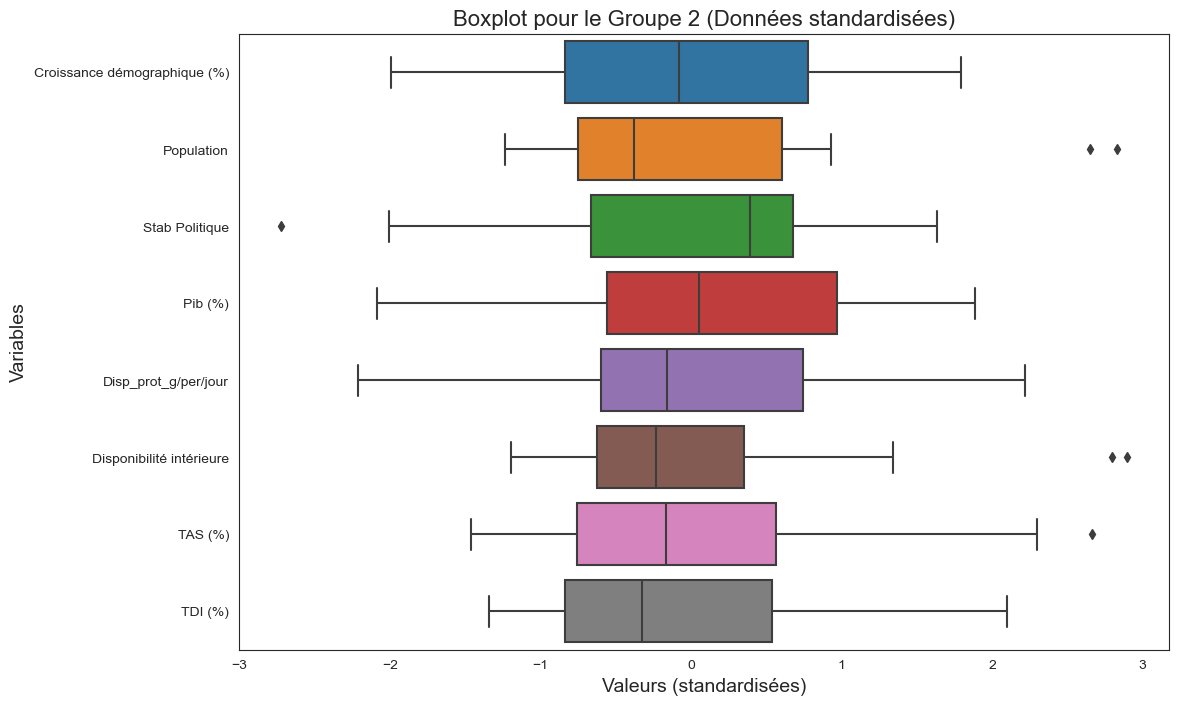

<Figure size 640x480 with 0 Axes>

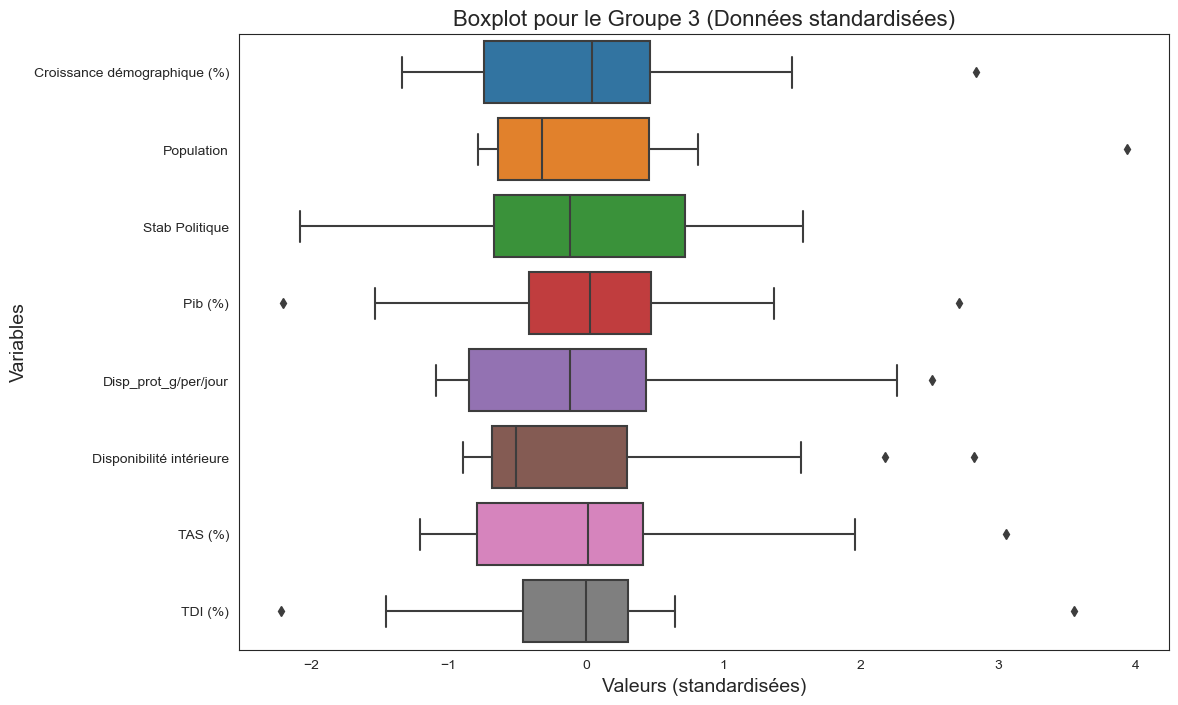

<Figure size 640x480 with 0 Axes>

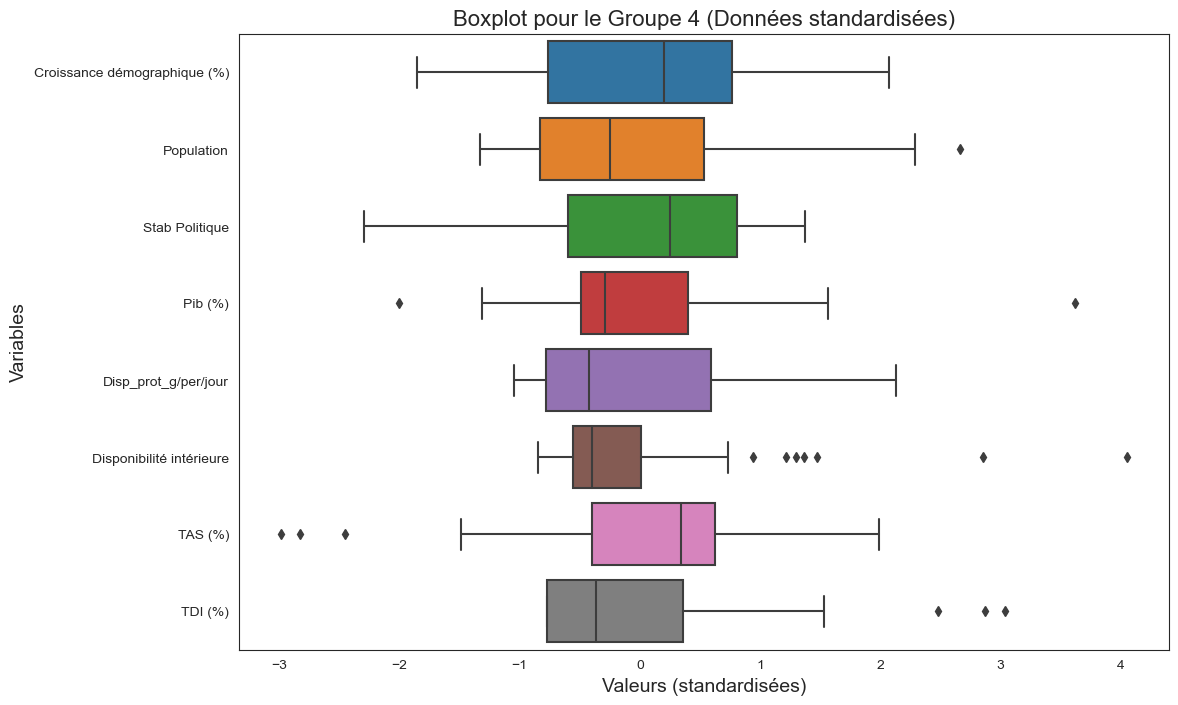

<Figure size 640x480 with 0 Axes>

In [81]:
# Liste des noms de variables à inclure dans les boxplots
variables = ["Croissance démographique (%)", "Population", "Stab Politique", "Pib (%)", 
             "Disp_prot_g/per/jour", "Disponibilité intérieure", "TAS (%)", "TDI (%)"]

# Liste des groupes (1, 2, 3, 4)
groupes = [1, 2, 3, 4]

# Créez un scaler pour standardiser les données
scaler = StandardScaler()

# Parcourez chaque groupe et créez un sous-ensemble de données pour ce groupe
for groupe in groupes:
    subset = df3[df3['Groupe'] == groupe]
    
    # Standardisez les données pour le groupe
    scaled_data = scaler.fit_transform(subset[variables])
    
    # Créez un DataFrame avec les données standardisées
    scaled_df = pd.DataFrame(scaled_data, columns=variables)
    
    # Créez un graphique à boîtes (boxplot) pour chaque variable du groupe
    plt.figure(figsize=(12, 8))
    plt.title(f'Boxplot pour le Groupe {groupe} (Données standardisées)', fontsize=16)
    
    # Utilisez seaborn pour créer le boxplot
    sns.boxplot(data=scaled_df, orient="h")
    
    # Ajoutez des étiquettes d'axe
    plt.xlabel("Valeurs (standardisées)", fontsize=14)
    plt.ylabel("Variables", fontsize=14)
    
    # Affichez le graphique
    plt.show()
    plt.savefig('repartition boxplot.jpeg') 

### La heatmap des groupes

<Figure size 2000x2000 with 0 Axes>

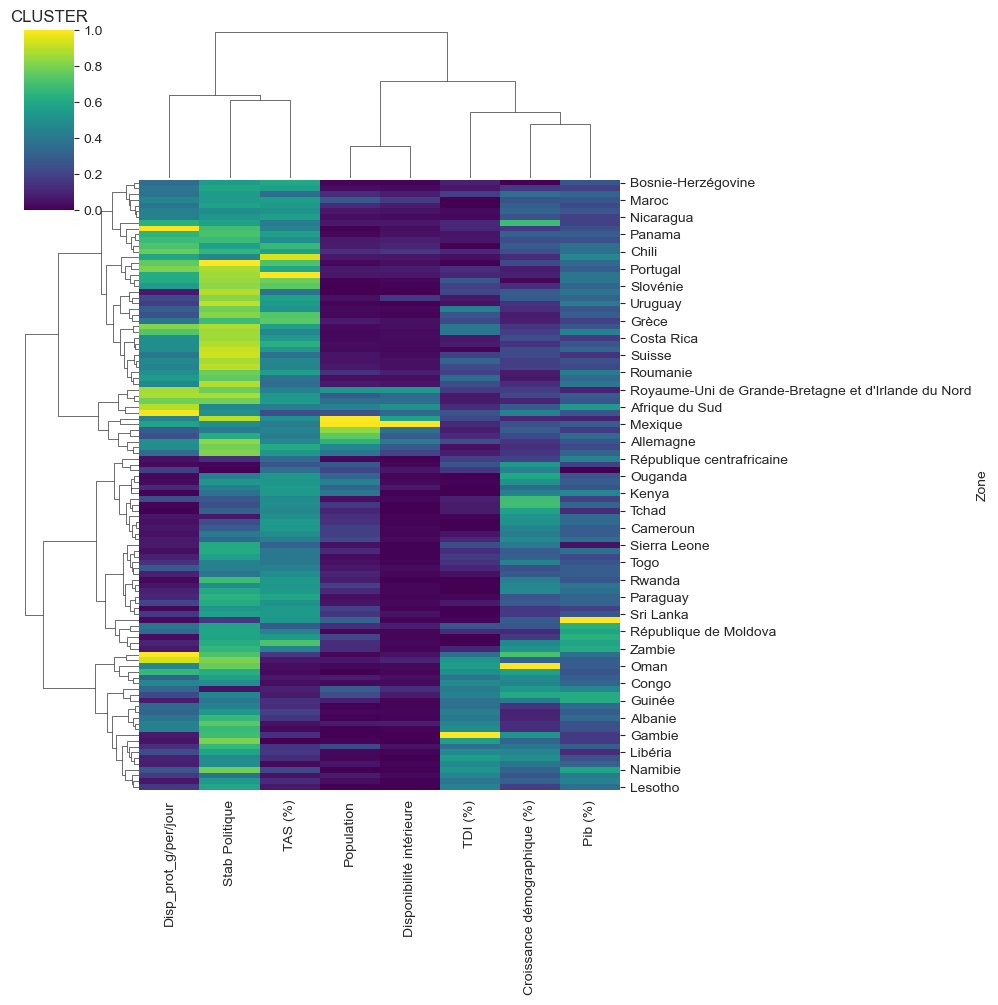

In [82]:
# Importez les bibliothèques nécessaires
import seaborn as sns
import matplotlib.pyplot as plt

# Créez la heatmap avec les noms des pays
plt.figure(figsize=(20, 20))
sns.clustermap(Data_finale.set_index('Zone'), cmap='viridis', method='ward', metric='euclidean', standard_scale=1)

# Ajoutez un titre à la heatmap
plt.title('CLUSTER')

# Enregistrez la heatmap au format d'image
plt.savefig('Heatmap Cluster.jpg')

## Conclusion : 

### Après ces différentes analyses, nous decidons de conserver le groupe 3 pour les raisons suivantes : 

### Les disponibilités les plus faibles
### Une auto-suffisance des plus faibles
### Une dépendance à l’importation des plus élevée 
### Une croissance démographique élevé
### Une bonne stabilité politique
### Un PIB élevé

## 6. Analyse du Groupe Candidat

In [83]:
X= cluster_3.values
X[:5]

array([[-9.56365485e-03,  2.88274000e+06,  1.10000000e-01,
         9.00000000e+00,  6.26000000e+00,  4.70000000e+01,
         2.76595745e+01,  8.08510638e+01,  3.00000000e+00],
       [ 1.97280354e-02,  2.95174500e+06, -8.40000000e-01,
         9.00000000e+00,  5.44000000e+00,  4.70000000e+01,
         2.34042553e+01,  7.44680851e+01,  3.00000000e+00],
       [ 2.10597046e-01,  1.14850440e+07, -3.00000000e-01,
         7.00000000e+00,  4.98000000e+00,  1.61000000e+02,
         1.11801242e+01,  7.63975155e+01,  3.00000000e+00],
       [ 1.92010580e-01,  5.24435900e+06, -6.10000000e-01,
         8.00000000e+00,  7.45000000e+00,  1.10000000e+02,
         6.36363636e+00,  9.45454545e+01,  3.00000000e+00],
       [ 7.38332062e-03,  1.13381340e+07,  4.30000000e-01,
         5.00000000e+00,  7.12000000e+00,  3.42000000e+02,
         8.47953216e+00,  9.12280702e+01,  3.00000000e+00]])

In [84]:
groupe_candidat=cluster_3.loc[:,cluster_3.columns != 'Groupe']
groupe_candidat.sort_values(by = ['Disp_prot_g/per/jour'], ascending = True).head()

,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%)
Zone,,,,,,,,
Mongolie,0.120583,3170216.0,0.65,2.0,0.95,9.0,0.000000,111.111111
Kirghizistan,0.115462,6304030.0,-0.43,13.0,1.08,32.0,21.875000,78.125000
Sierra Leone,0.169228,7650150.0,-0.16,-3.0,1.24,30.0,56.666667,46.666667
Gambie,0.234405,2280094.0,0.18,2.0,1.24,8.0,25.000000,200.000000
Tadjikistan,0.161740,9100835.0,-0.61,8.0,1.45,40.0,5.000000,95.000000


### 6.1 Le Kmean

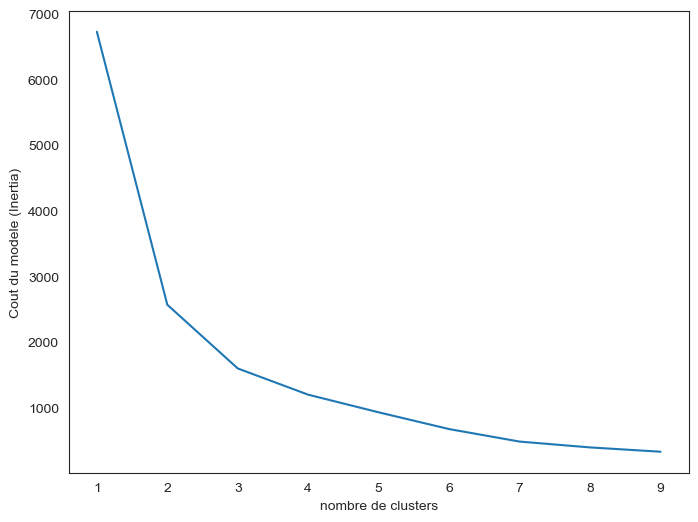

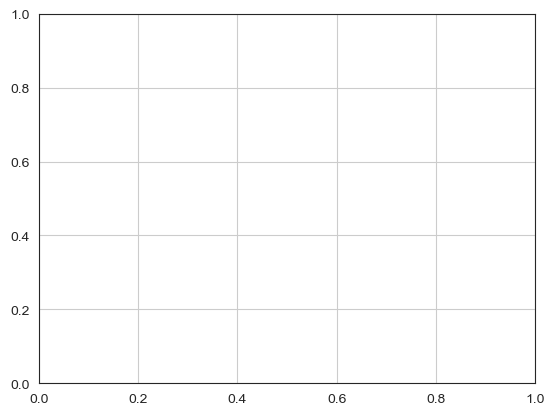

In [85]:
Y= cluster_3.values
# centrer et réduire les données
std_scale2 = preprocessing.StandardScaler().fit(Y)
X_scaled2 = std_scale2.transform(Y)
# création d'une Matrice des liens selon la Méthode de Ward
Z2 = linkage(X_scaled2, method = 'ward', metric='euclidean')
inertia2 = []
k_range2=range(1,10)
for k2 in k_range2:
    model2=KMeans(n_clusters=k2).fit(Z2)
    inertia2.append(model2.inertia_)
    
fig = plt.figure(figsize=(8,6))
plt.plot(k_range2,inertia2 )
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')
plt.show()
plt.grid()

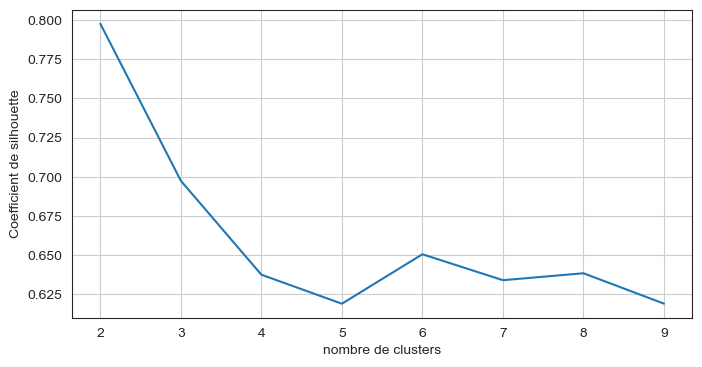

[0.7976119756145086,
 0.6974266385229373,
 0.6375054835262505,
 0.6189878770557121,
 0.6505498693369705,
 0.6339936643201963,
 0.6384294370237251,
 0.6190300828378803]

In [86]:
from sklearn.metrics import silhouette_score
tab_silhouette =[]
k_range2=range(2,10)
for k2 in k_range2:
    model=KMeans(n_clusters=k2)
    cluster_labels=model.fit_predict(X)
    tab_silhouette.append(silhouette_score(X,cluster_labels))

fig = plt.figure(figsize=(8,4))
plt.plot(k_range,tab_silhouette)
plt.xlabel('nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid()
plt.show()
tab_silhouette

### 6.2 Les nuages de points et leur centroides

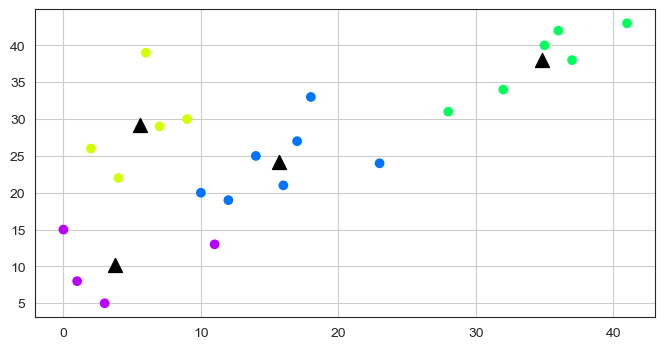

Inertie totale : 1198.9628229193584


In [87]:
model3 = KMeans(n_clusters=4)
model3.fit(Z2)

# Définissez une palette de couleurs distinctes pour les clusters
palette = sns.color_palette("hsv", 4)

# Créez un nuage de points avec une couleur différente pour chaque cluster
plt.figure(figsize=(8, 4))
cluster_colors = [palette[x] for x in model3.predict(Z2)]
plt.scatter(Z2[:, 0], Z2[:, 1], c=cluster_colors, cmap='viridis')  

# Tracez les centroïdes avec une couleur différente
plt.scatter(model3.cluster_centers_[:, 0], model3.cluster_centers_[:, 1], marker='^', c='black', s=100)

plt.grid()
plt.show()

# Affichez l'inertie totale
print('Inertie totale :', model3.inertia_)

In [88]:
#Identification des 4 groupes obtenus
groupes = fcluster(Z2, 4, criterion='maxclust')
#index triés des groupes
idg2 = np.argsort(groupes)
#Affichage des pays selon leurs groupes
df_groupe = pd.DataFrame(cluster_3.index[idg2], groupes[idg2]).reset_index()
df_groupe2 = df_groupe.rename(columns={'index':'Sous_Groupes'})
df_groupe2['Sous_Groupes'].unique()

array([1, 2, 3, 4], dtype=int64)

In [89]:
#Intégration des références des groupes dans notre échantillon de départ représenté par le dataframe "df_groupe2"
#Jointure interne nécessaire pour parvenir à agréger nos données
df_gr = pd.merge(cluster_3, df_groupe2, on='Zone')
df_gr.set_index('Zone', inplace=True)
df_gr.head(40)


,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Groupe,Sous_Groupes
Zone,,,,,,,,,,
Albanie,-0.009564,2882740.0,0.11,9.0,6.26,47.0,27.659574,80.851064,3,1
Arménie,0.019728,2951745.0,-0.84,9.0,5.44,47.0,23.404255,74.468085,3,1
Bénin,0.210597,11485044.0,-0.30,7.0,4.98,161.0,11.180124,76.397516,3,1
Congo,0.192011,5244359.0,-0.61,8.0,7.45,110.0,6.363636,94.545455,3,1
Cuba,0.007383,11338134.0,0.43,5.0,7.12,342.0,8.479532,91.228070,3,4
Gabon,0.256554,2119275.0,-0.09,6.0,10.59,78.0,5.128205,97.435897,3,1
Gambie,0.234405,2280094.0,0.18,2.0,1.24,8.0,25.000000,200.000000,3,1
Ghana,0.162095,29767102.0,0.07,7.0,2.26,211.0,28.436019,71.563981,3,4
Géorgie,-0.012698,4002942.0,-0.42,7.0,5.19,61.0,36.065574,83.606557,3,1


In [90]:
# Cluster 1bis
cluster_1bis=df_gr.loc[df_gr['Sous_Groupes']==1]
cluster_1bis.head(16)

,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Groupe,Sous_Groupes
Zone,,,,,,,,,,
Albanie,-0.009564,2882740.0,0.11,9.0,6.26,47.0,27.659574,80.851064,3,1
Arménie,0.019728,2951745.0,-0.84,9.0,5.44,47.0,23.404255,74.468085,3,1
Bénin,0.210597,11485044.0,-0.30,7.0,4.98,161.0,11.180124,76.397516,3,1
Congo,0.192011,5244359.0,-0.61,8.0,7.45,110.0,6.363636,94.545455,3,1
Gabon,0.256554,2119275.0,-0.09,6.0,10.59,78.0,5.128205,97.435897,3,1
Gambie,0.234405,2280094.0,0.18,2.0,1.24,8.0,25.000000,200.000000,3,1
Géorgie,-0.012698,4002942.0,-0.42,7.0,5.19,61.0,36.065574,83.606557,3,1
Haïti,0.086419,11123178.0,-1.10,12.0,2.75,98.0,9.183673,90.816327,3,1
Kirghizistan,0.115462,6304030.0,-0.43,13.0,1.08,32.0,21.875000,78.125000,3,1


In [91]:
# Cluster 2bis
cluster_2bis=df_gr.loc[df_gr['Sous_Groupes']==2]
cluster_2bis.head()

,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Groupe,Sous_Groupes
Zone,,,,,,,,,,
Jordanie,0.331066,9965318.0,-0.28,3.0,10.10,275.0,76.363636,23.272727,3,2
Sierra Leone,0.169228,7650150.0,-0.16,-3.0,1.24,30.0,56.666667,46.666667,3,2


In [92]:
# Cluster 3bis
cluster_3bis=df_gr.loc[df_gr['Sous_Groupes']==3]
cluster_3bis.head()

,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Groupe,Sous_Groupes
Zone,,,,,,,,,,
Koweït,0.345821,4137312.0,0.30,10.0,15.87,189.0,29.629630,72.486772,3,3
Oman,0.514953,4829473.0,0.51,7.0,7.38,114.0,6.140351,110.526316,3,3


In [93]:
# Cluster 4bis
cluster_4bis=df_gr.loc[df_gr['Sous_Groupes']==4]
cluster_4bis.head()

,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Groupe,Sous_Groupes
Zone,,,,,,,,,,
Cuba,0.007383,11338134.0,0.43,5.0,7.12,342.0,8.479532,91.228070,3,4
Ghana,0.162095,29767102.0,0.07,7.0,2.26,211.0,28.436019,71.563981,3,4
Émirats arabes unis,0.110274,9630959.0,0.65,7.0,14.80,412.0,11.650485,105.097087,3,4


In [94]:
#afficher les centroides des clusters de chaque sous - groupes
groupe=(1,2,3,4)
for n in groupe:
    moy=df_gr.loc[df_gr['Sous_Groupes']==n].mean()
    moy_entier = moy.astype(int)
    print('Groupe',n,moy_entier)

Groupe 1 Croissance démographique (%)          0
Population                      4782895
Stab Politique                        0
Pib (%)                               7
Disp_prot_g/per/jour                  4
Disponibilité intérieure             53
TAS (%)                              17
TDI (%)                              98
Groupe                                3
Sous_Groupes                          1
dtype: int32
Groupe 2 Croissance démographique (%)          0
Population                      8807734
Stab Politique                        0
Pib (%)                               0
Disp_prot_g/per/jour                  5
Disponibilité intérieure            152
TAS (%)                              66
TDI (%)                              34
Groupe                                3
Sous_Groupes                          2
dtype: int32
Groupe 3 Croissance démographique (%)          0
Population                      4483392
Stab Politique                        0
Pib (%)                    

### Conclusion : 

#### Nous decidons de garder les sous groupes 1,3 et 4 car le sous groupe 2 presente un TAS beaucoup plus elevé que les 3 autres groupes (66% contre 17%) et un TDI bien plus faible (34% contre 93%)

In [95]:
# Concaténer les DataFrames cluster_1bis, cluster_3bis, et cluster_4bis sur l'index
cluster_final = pd.concat([cluster_1bis, cluster_3bis, cluster_4bis], axis=0)

cluster_final.head(21)


,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Groupe,Sous_Groupes
Zone,,,,,,,,,,
Albanie,-0.009564,2882740.0,0.11,9.0,6.26,47.0,27.659574,80.851064,3,1
Arménie,0.019728,2951745.0,-0.84,9.0,5.44,47.0,23.404255,74.468085,3,1
Bénin,0.210597,11485044.0,-0.30,7.0,4.98,161.0,11.180124,76.397516,3,1
Congo,0.192011,5244359.0,-0.61,8.0,7.45,110.0,6.363636,94.545455,3,1
Gabon,0.256554,2119275.0,-0.09,6.0,10.59,78.0,5.128205,97.435897,3,1
Gambie,0.234405,2280094.0,0.18,2.0,1.24,8.0,25.000000,200.000000,3,1
Géorgie,-0.012698,4002942.0,-0.42,7.0,5.19,61.0,36.065574,83.606557,3,1
Haïti,0.086419,11123178.0,-1.10,12.0,2.75,98.0,9.183673,90.816327,3,1
Kirghizistan,0.115462,6304030.0,-0.43,13.0,1.08,32.0,21.875000,78.125000,3,1


### Dans ce groupe là, nous pouvons encore isoler les pays ayant un besoin encore plus important (TAS < 10% et TDI > 90%) que nous pourrons ensuite transposer avec les autres variables (Stabilité politique notamment) afin d'affiner notre choix.

In [97]:
individus_list = cluster_final[(cluster_final['TDI (%)'] > 90) & (cluster_final['TAS (%)'] < 10)]
individus_list.head(20)

individus_list_trie = individus_list.sort_values(by='Stab Politique', ascending=False)

individus_list_trie.head(20)


,Croissance démographique (%),Population,Stab Politique,Pib (%),Disp_prot_g/per/jour,Disponibilité intérieure,TAS (%),TDI (%),Groupe,Sous_Groupes
Zone,,,,,,,,,,
Mongolie,0.120583,3170216.0,0.65,2.0,0.95,9.0,0.000000,111.111111,3,1
Oman,0.514953,4829473.0,0.51,7.0,7.38,114.0,6.140351,110.526316,3,3
Cuba,0.007383,11338134.0,0.43,5.0,7.12,342.0,8.479532,91.228070,3,4
Macédoine du Nord,0.003793,2082957.0,0.12,5.0,7.01,41.0,4.878049,97.560976,3,1
Gabon,0.256554,2119275.0,-0.09,6.0,10.59,78.0,5.128205,97.435897,3,1
Congo,0.192011,5244359.0,-0.61,8.0,7.45,110.0,6.363636,94.545455,3,1
Tadjikistan,0.161740,9100835.0,-0.61,8.0,1.45,40.0,5.000000,95.000000,3,1
Haïti,0.086419,11123178.0,-1.10,12.0,2.75,98.0,9.183673,90.816327,3,1


### Les choix idéaux si nous souhaitons travailler dans un pays avec une stabilité positive sont : 

### Macédoine du Nord / Mongolie / Oman / Cuba

### L'equipe metier affinera ce choix pour la decision finale